# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load Dataset

In [2]:
data = pd.read_csv('datasets/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.duplicated().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

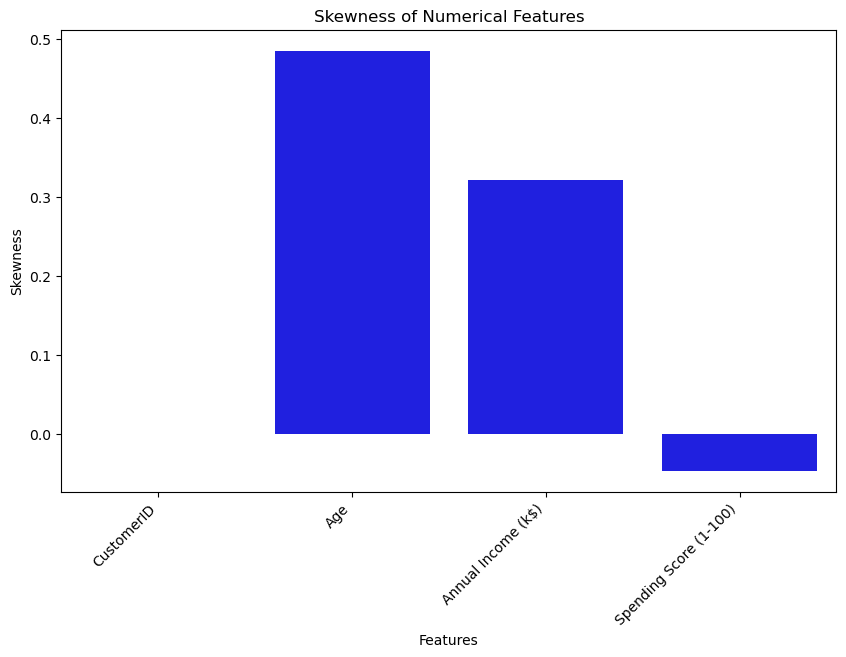

In [8]:
# Calculate skewness for each numerical column
skewness = data.select_dtypes(include=['int64']).skew()

# Plot skewness values
plt.figure(figsize=(10,6))
sns.barplot(x=skewness.index, y=skewness.values, color='blue')
plt.title('Skewness of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')
sns.set_context("notebook", font_scale=1)
plt.show

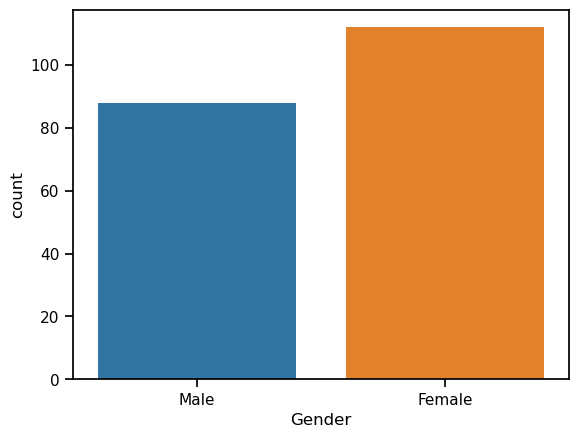

In [9]:
sns.countplot(x=data['Gender'])
sns.set_context("notebook", font_scale=1)
plt.show()

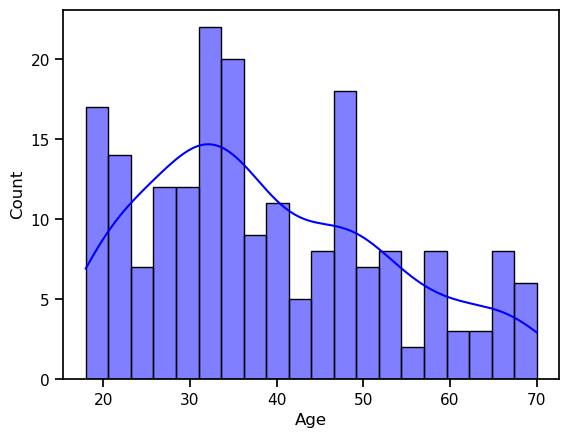

In [10]:
sns.set_context("notebook", font_scale=1)
sns.histplot(data['Age'], kde=True, color='blue', bins=20)
plt.show()

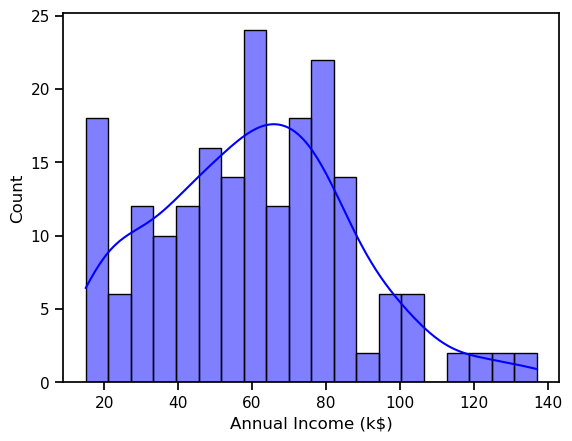

In [11]:
sns.set_context("notebook", font_scale=1)
sns.histplot(data['Annual Income (k$)'], kde=True, color='blue', bins=20)
plt.show()

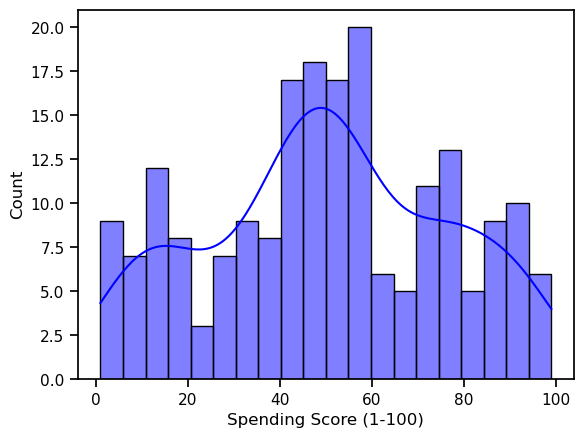

In [12]:
sns.set_context("notebook", font_scale=1)
sns.histplot(data['Spending Score (1-100)'], kde=True, color='blue', bins=20)
plt.show()

d:\Mamba\mambaforge\envs\resume_project\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


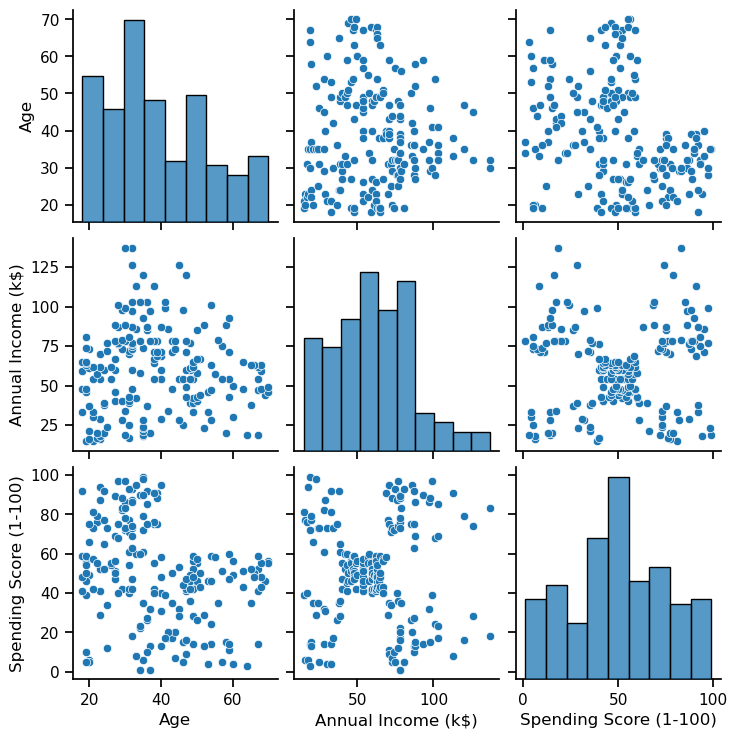

In [13]:
sns.set_context("notebook", font_scale=1)
sns.pairplot(data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

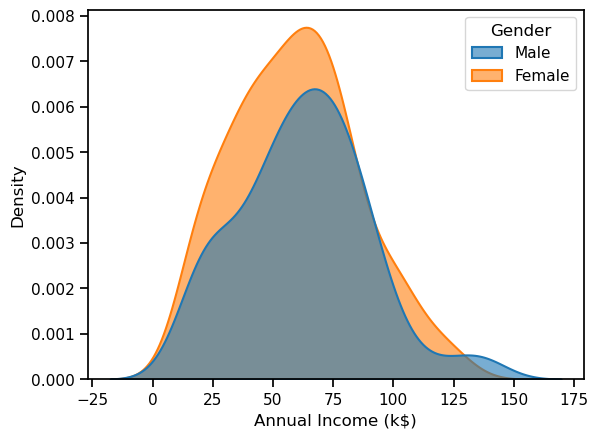

In [14]:
sns.kdeplot(data=data, x='Annual Income (k$)', hue='Gender', fill=True, alpha=0.6, linewidth=1.5)
sns.set_context("notebook", font_scale=1)
plt.show()

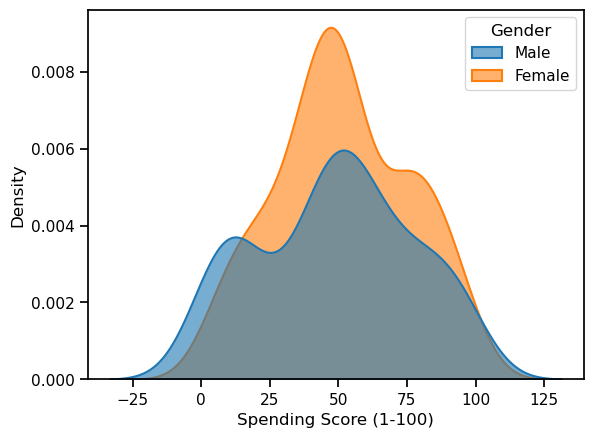

In [15]:
sns.kdeplot(data=data, x='Spending Score (1-100)', hue='Gender', fill=True, alpha=0.6, linewidth=1.5)
sns.set_context("notebook", font_scale=1)
plt.show()

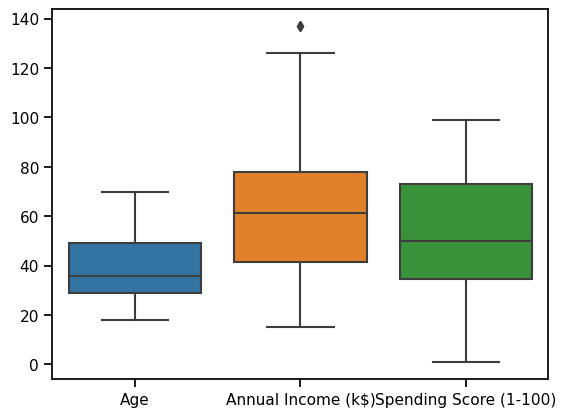

In [16]:
sns.boxplot(data=data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
sns.set_context("notebook", font_scale=1)
plt.show()

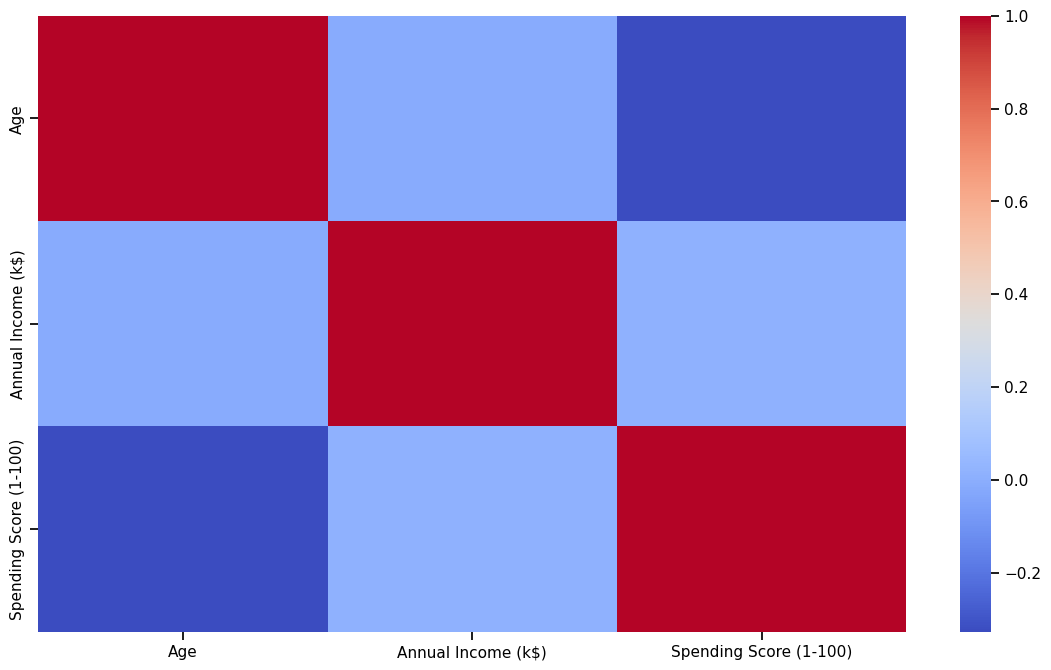

In [17]:
corr_data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
fig = plt.subplots(figsize=(14,8))
corr = corr_data.corr()
sns.heatmap(corr,cmap='coolwarm')
sns.set_context("notebook", font_scale=1)
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

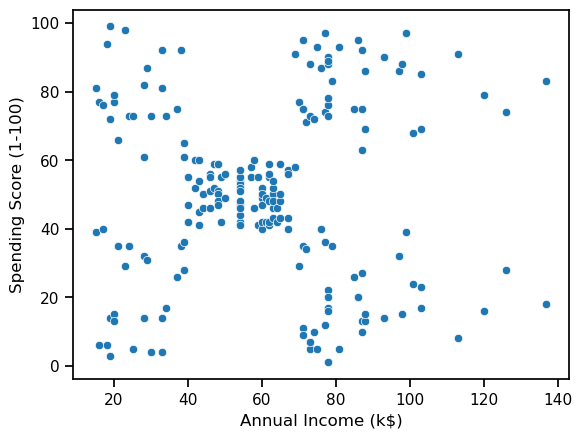

In [18]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)

# Let's apply K-means Clustering

In [19]:
# Define the features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [20]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

In [21]:
# Range of k values to try
k_values = range(2, 11)  # You can adjust the range as needed

# Empty lists to store silhouette scores and distortions
silhouette_scores = []
distortions = []

# Iterate over each value of k
for k in k_values:
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    
    # Fit the model to the data
    kmeans.fit(X)
    
    # Get cluster labels
    labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    
    # Calculate distortion (inertia)
    distortion = kmeans.inertia_
    distortions.append(distortion)

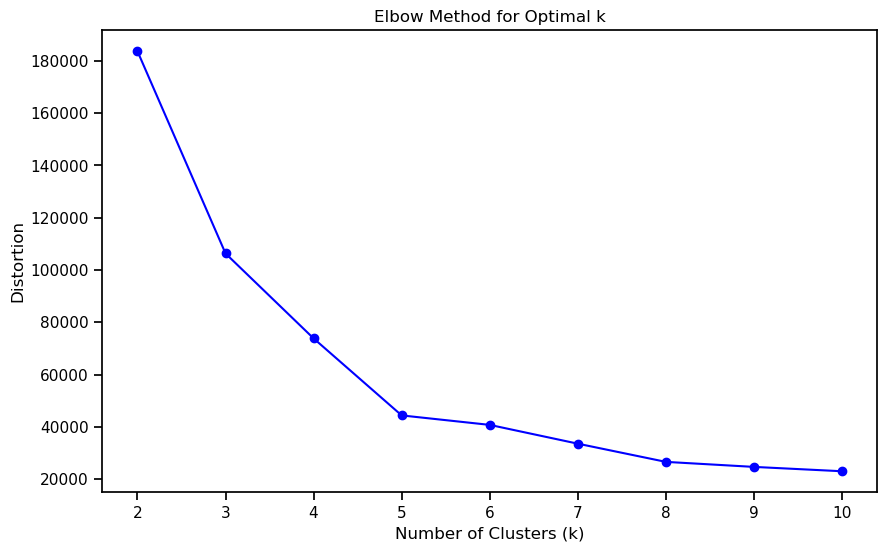

In [22]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, distortions, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.xticks(k_values)
sns.set_context("notebook", font_scale=1)
plt.show()

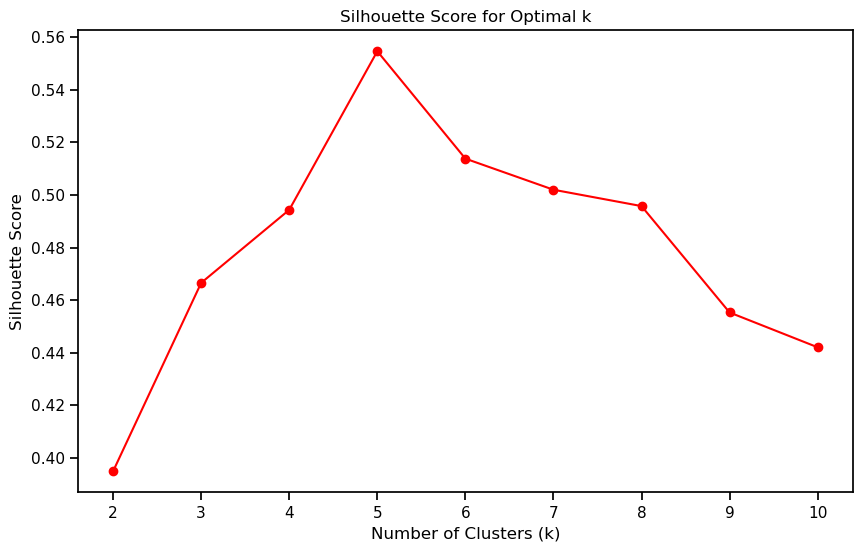

In [23]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='r')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
sns.set_context("notebook", font_scale=1)
plt.show()

In [24]:
# Find the best k based on silhouette score
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k based on silhouette score: {best_k}")

# Initialize KMeans with the best k
best_kmeans = KMeans(n_clusters=best_k, random_state=42)
best_kmeans.fit(X)

# Add cluster labels to the original dataset
data['Cluster'] = best_kmeans.labels_

Best k based on silhouette score: 5


d:\Mamba\mambaforge\envs\resume_project\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


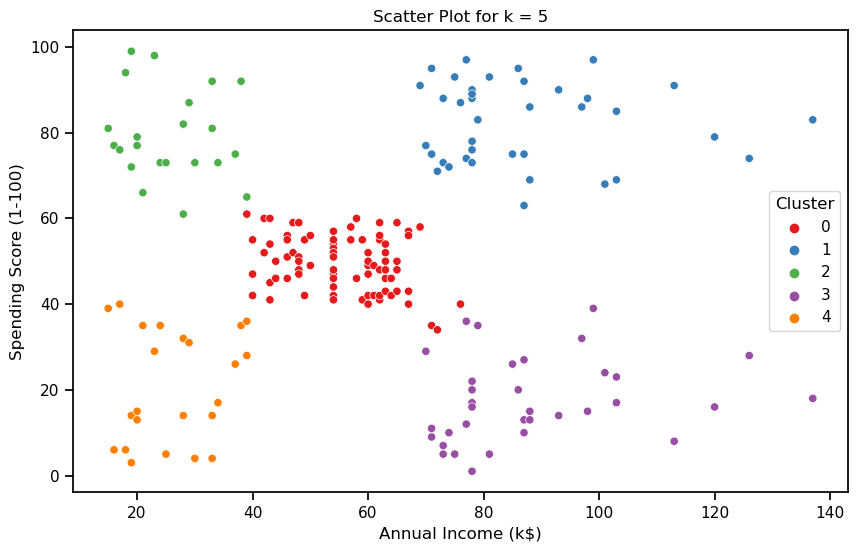

In [25]:
# Visualize the scatter plot for the best k
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title(f'Scatter Plot for k = {best_k}')
sns.set_context("notebook", font_scale=1)
plt.show()

Based on the analysis of the scatter plot depicting 'Annual Income' against 'Spending Score', the dataset has been clustered into distinct groups representing different consumer segments. Here's a descriptive observation for each cluster:

- **Cluster 0 : Moderate Income, Moderate Spending**: This cluster comprises individuals with moderate annual income levels and corresponding moderate spending scores. They exhibit average spending behavior relative to their income.

- **Cluster 1 : High Income, High Spending**: Individuals in this cluster have high annual income levels coupled with high spending scores. They represent affluent customers who are willing to spend generously on products and services.

- **Cluster 2 : Low Income, High Spending**: This cluster consists of individuals with low annual income but high spending scores. Despite their limited income, they demonstrate a propensity for high spending, possibly due to factors such as credit utilization or discretionary spending habits.

- **Cluster 3 : High Income, Low Spending**: Individuals in this cluster have high annual income levels but relatively low spending scores. They exhibit conservative spending behavior despite their financial capacity, suggesting a preference for saving or investing rather than discretionary spending.

- **Cluster 4 : Low Income, Low Spending**: This cluster represents individuals with both low annual income levels and low spending scores. They exhibit restrained spending habits in line with their limited financial resources.


In [26]:
df = data.copy()

In [27]:
# Assign descriptive names to clusters based on characteristics
cluster_names = {
    0: "Moderate Income, Moderate Spending",
    1: "High Income, High Spending",
    2: "Low Income, High Spending",
    3: "High Income, Low Spending",
    4: "Low Income, Low Spending"
}

# Map cluster names to cluster labels in the dataset
df['Customer Behaviour'] = df['Cluster'].map(cluster_names)

# Separate "Cluster Name" into "Income Status" and "Spending Status" columns
df[['Income Status', 'Spending Status']] = df['Customer Behaviour'].str.split(', ', expand=True)

# Drop the "Cluster Name" column
df.drop(columns=['Cluster'], inplace=True)

In [28]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Customer Behaviour,Income Status,Spending Status
0,1,Male,19,15,39,"Low Income, Low Spending",Low Income,Low Spending
1,2,Male,21,15,81,"Low Income, High Spending",Low Income,High Spending
2,3,Female,20,16,6,"Low Income, Low Spending",Low Income,Low Spending
3,4,Female,23,16,77,"Low Income, High Spending",Low Income,High Spending
4,5,Female,31,17,40,"Low Income, Low Spending",Low Income,Low Spending
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,"High Income, High Spending",High Income,High Spending
196,197,Female,45,126,28,"High Income, Low Spending",High Income,Low Spending
197,198,Male,32,126,74,"High Income, High Spending",High Income,High Spending
198,199,Male,32,137,18,"High Income, Low Spending",High Income,Low Spending


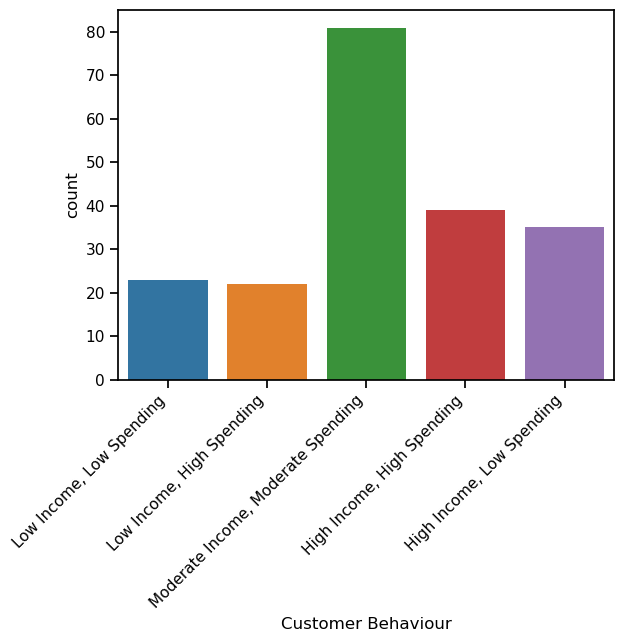

In [29]:
sns.countplot(x='Customer Behaviour',data=df)
plt.xticks(rotation=45, ha='right')
sns.set_context("notebook", font_scale=1)

### Clusters That Should Be Noticed

#### High Income, High Spending
- These customers have both high income and high spending scores, indicating they are affluent and willing to spend generously.
- Targeting this group can be lucrative as they have the financial means and willingness to make significant purchases.

#### Low Income, High Spending
- Despite having low income, these customers exhibit high spending behavior.
- They may be using credit or prioritizing discretionary spending, making them potential targets for specific promotions or offers.

#### High Income, Low Spending
- These customers have high income levels but relatively low spending scores.
- They may be conservative in their spending habits or have specific preferences for saving or investing.
- Targeting this group could involve strategies to incentivize spending or address barriers to purchasing.


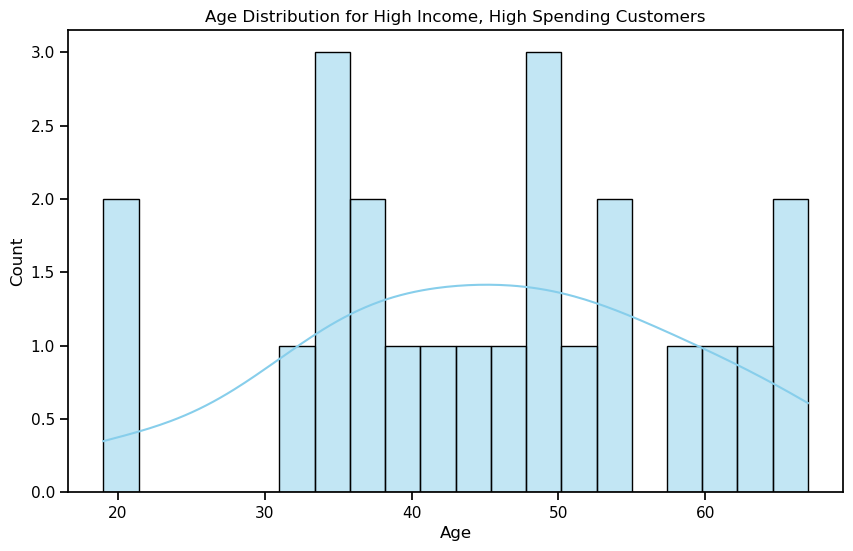

In [30]:
cluster_data = df[df['Customer Behaviour'] == "Low Income, Low Spending"]

# Plot the distribution of age for the "High Income, High Spending" cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=cluster_data, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution for High Income, High Spending Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

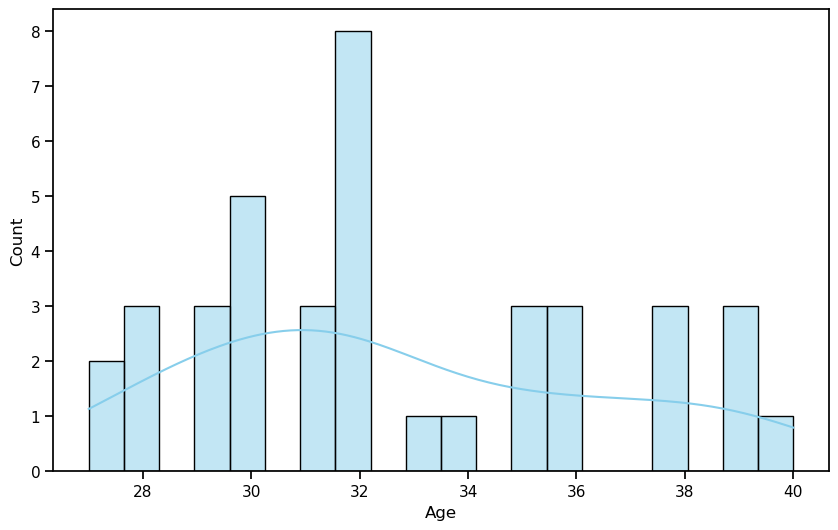

In [31]:
cluster_data = df[df['Customer Behaviour'] == "High Income, High Spending"]

# Plot the distribution of age for the "High Income, High Spending" cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=cluster_data, x='Age', bins=20, kde=True, color='skyblue')
plt.show()

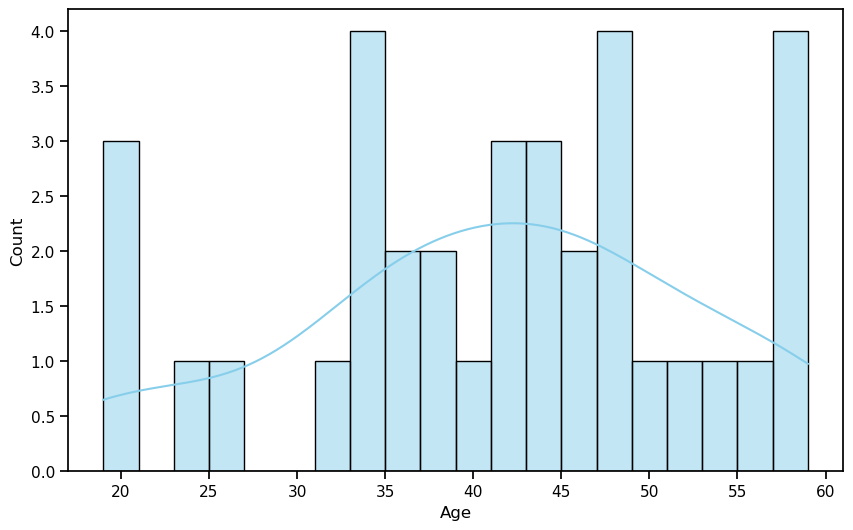

In [32]:
cluster_data = df[df['Customer Behaviour'] == "High Income, Low Spending"]

# Plot the distribution of age for the "High Income, High Spending" cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=cluster_data, x='Age', bins=20, kde=True, color='skyblue')
plt.show()

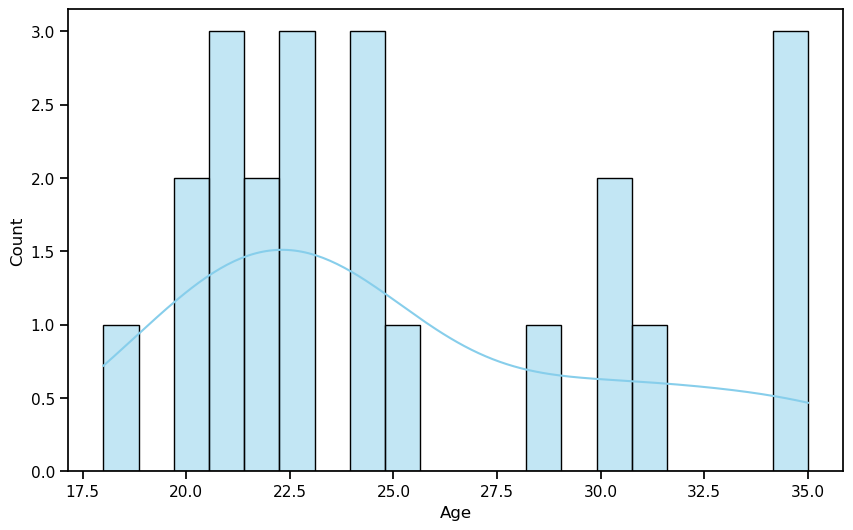

In [33]:
cluster_data = df[df['Customer Behaviour'] == "Low Income, High Spending"]

# Plot the distribution of age for the "High Income, High Spending" cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=cluster_data, x='Age', bins=20, kde=True, color='skyblue')
plt.show()

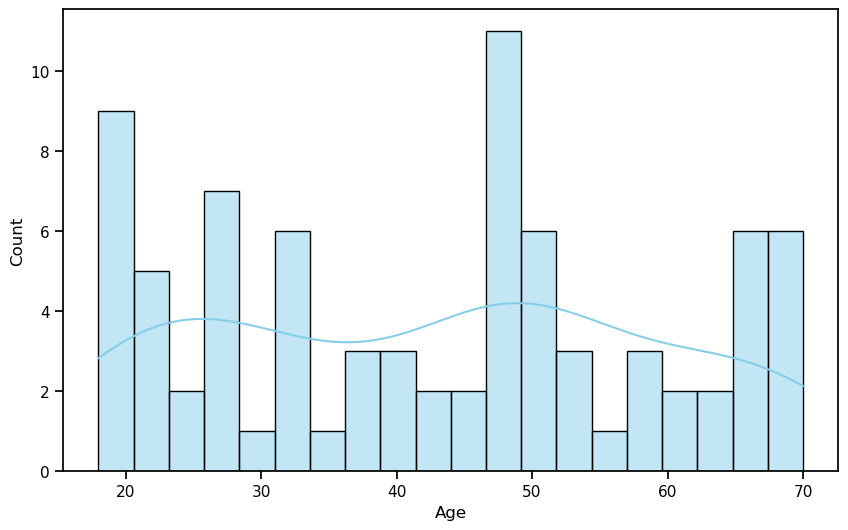

In [34]:
cluster_data = df[df['Customer Behaviour'] == "Moderate Income, Moderate Spending"]

# Plot the distribution of age for the "High Income, High Spending" cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=cluster_data, x='Age', bins=20, kde=True, color='skyblue')
plt.show()